https://towardsdatascience.com/jupyter-notebook-extensions-517fa69d2231

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('adult.csv')
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [3]:
df.replace('?',np.nan,inplace = True)

In [4]:
df=df.drop('fnlwgt',axis=1)

In [5]:
df.income.value_counts()

<=50K    24720
>50K      7841
Name: income, dtype: int64

In [ ]:
dataset
0: 400
1: 100

splitting --> random

train 80% 0: 400    1:0  
test 20% 0: 0       1:100

stratify --> agar ratio kelas di train dan test menyesuaikan dengan ratio awal

train --> 4:1--> 320:80
test:4:1 --> 80:20

In [106]:
# EDA

In [107]:
df.isna().sum()

age                  0
workclass         1836
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   education       32561 non-null  object
 3   education.num   32561 non-null  int64 
 4   marital.status  32561 non-null  object
 5   occupation      30718 non-null  object
 6   relationship    32561 non-null  object
 7   race            32561 non-null  object
 8   sex             32561 non-null  object
 9   capital.gain    32561 non-null  int64 
 10  capital.loss    32561 non-null  int64 
 11  hours.per.week  32561 non-null  int64 
 12  native.country  31978 non-null  object
 13  income          32561 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.5+ MB


In [109]:
df.describe(include='all')

,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
count,32561.000000,30725,32561,32561.000000,32561,30718,32561,32561,32561,32561.000000,32561.000000,32561.000000,31978,32561
unique,NaN,8,16,NaN,7,14,6,5,2,NaN,NaN,NaN,41,2
top,NaN,Private,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,10501,NaN,14976,4140,13193,27816,21790,NaN,NaN,NaN,29170,24720
mean,38.581647,NaN,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,1077.648844,87.303830,40.437456,NaN,NaN
std,13.640433,NaN,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,7385.292085,402.960219,12.347429,NaN,NaN
min,17.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


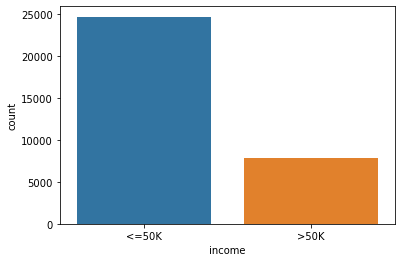

In [110]:
sns.countplot('income', data=df)

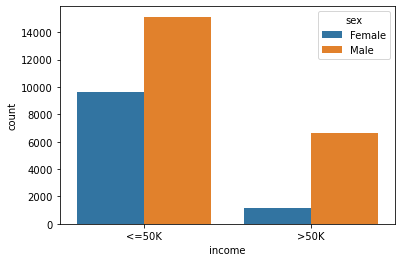

In [111]:
sns.countplot('income', data=df, hue='sex')

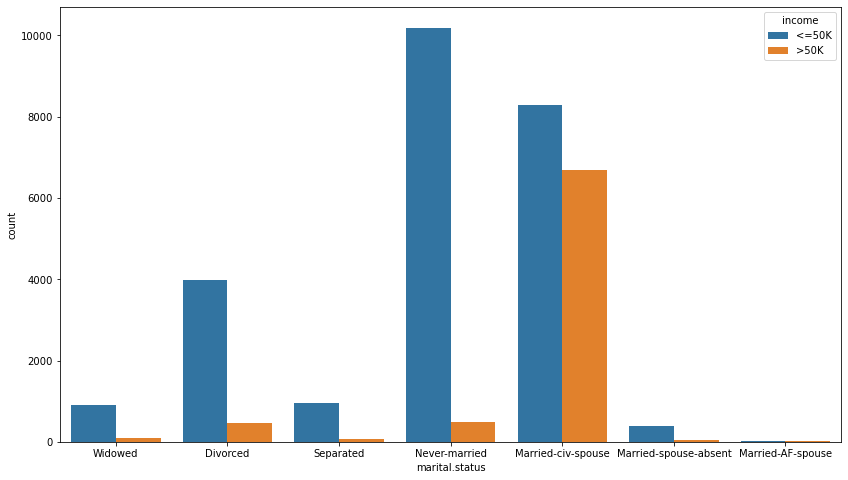

In [112]:
plt.figure(figsize=(14,8))
sns.countplot('marital.status', data=df, hue='income')

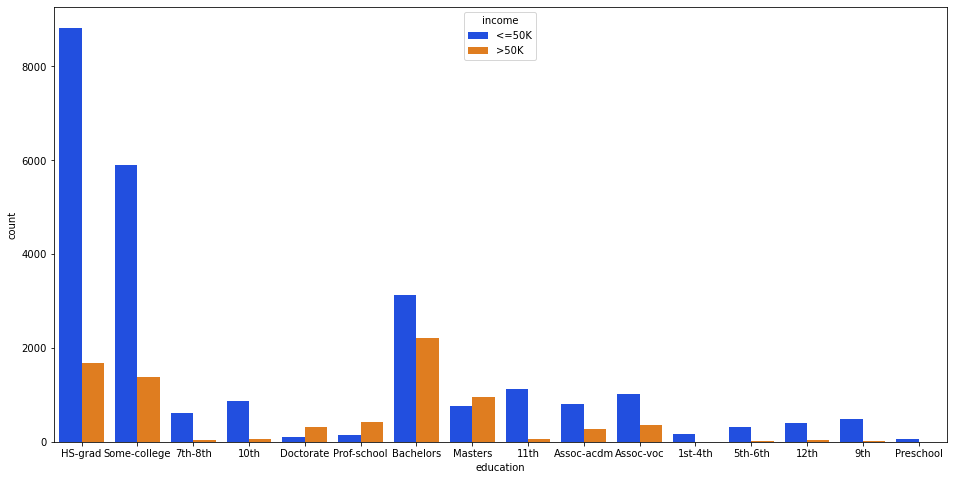

In [113]:
plt.figure(figsize=(16,8))
sns.countplot('education', data=df, hue='income', palette='bright')

In [114]:
# Preprocessing

In [115]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.impute import SimpleImputer

import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder

In [116]:
binary_encoder_pipeline = Pipeline([
                                    ('imputer',SimpleImputer(strategy = 'constant',fill_value = 'NC')),
                                    ('binary encoder',ce.BinaryEncoder())
])

transformer = ColumnTransformer([
                                 ('one hot encoder',OneHotEncoder(drop = 'first'),['relationship','race','sex']),
                                 ('binary encoder',binary_encoder_pipeline,['workclass','marital.status','occupation','native.country'])
                                ], remainder = 'passthrough')

In [117]:
# Data Splitting

In [118]:
X = df.drop(columns = ['income','education'])
y = np.where(df['income']=='>50K',1,0)

In [119]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    stratify = y, 
    random_state = 2020)

In [120]:
# Benchmark

In [121]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import f1_score, classification_report
from sklearn.model_selection import StratifiedKFold, cross_val_score

In [122]:
def evaluate(df,model):

    model_name=[]
    f1_score=[]
    f1_std=[]
    for name, model in model:
        model = model
        estimator = Pipeline([
            ('preprocess', transformer),
            ('model', model)])

        skfold=StratifiedKFold(n_splits=5)
        score= cross_val_score(estimator,X_train,y_train,scoring='f1',cv=skfold).mean()
        std= cross_val_score(estimator,X_train,y_train,scoring='f1',cv=skfold).std()
        f1_score.append(score)
        f1_std.append(std)
        model_name.append(name)

    return pd.DataFrame({'Name': model_name,'f1_score':f1_score, 'f1_std':f1_std})

In [123]:
models = [
    ['Log Regression', LogisticRegression()],
    ['DecisionTree', DecisionTreeClassifier()],
    ['RandomForest', RandomForestClassifier()],
    ['KNeighbours', KNeighborsClassifier(n_neighbors = 2)]]

In [124]:
evaluate(df,models)


,Name,f1_score,f1_std
0,Log Regression,0.602302,0.013442
1,DecisionTree,0.614489,0.009547
2,RandomForest,0.664088,0.011956
3,KNeighbours,0.587445,0.014295


In [125]:
model=RandomForestClassifier()

estimator = Pipeline([
    ('preprocess', transformer),
    ('model', model)])

estimator.fit(X_train,y_train)
f1_score(y_test,estimator.predict(X_test))

0.6681139755766621

In [126]:
# Balancing

In [136]:
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import NearMiss, RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [137]:
model= RandomForestClassifier()
under=NearMiss()
over=SMOTE()


In [138]:
estimator = Pipeline([('preprocess', transformer),('balancing',over),('clf',model)])
skfold=StratifiedKFold(n_splits=5)

In [139]:
hyperparam_space={'balancing':[over,under]}

In [140]:
grid_search= GridSearchCV(estimator,
    param_grid= hyperparam_space,
    cv=skfold,
    n_jobs=-1,
    scoring='f1')

In [141]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('one '
                                                                         'hot '
                                                                         'encoder',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['relationship',
                                                                          'race',
                                                                          'sex']),
                                                                        ('binary '
                                                                         'encoder',
                

In [142]:
 grid_search.best_score_

0.6595661574439025

In [147]:
grid_search.best_estimator_.fit(X_train,y_train)
f1_score(y_test,grid_search.best_estimator_.predict(X_test))

0.6614090431125131

In [144]:
# Better without balancing

In [ ]:
Tunning Random Forest

In [145]:
hyperparam_space = {
        # 'model__n_estimators' : [50, 75, 100, 150],
        'model__min_samples_leaf' : [1,5,10,15,20,50],
        'model__min_samples_split' : [2,5,10,15,20,50],
        'model__max_depth' : [2,3,4,5,6,7],
        'model__criterion' : ['entropy','gini']}

In [146]:
estimator=Pipeline([('preprocess',transformer),('model',RandomForestClassifier())])
skfold= StratifiedKFold(n_splits=5)

grid= GridSearchCV(estimator,param_grid=hyperparam_space,cv=skfold,scoring='f1',n_jobs=-1)
grid.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('one '
                                                                         'hot '
                                                                         'encoder',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['relationship',
                                                                          'race',
                                                                          'sex']),
                                                                        ('binary '
                                                                         'encoder',
                

In [148]:
grid.best_score_

0.6267594031667175

In [149]:
grid.best_estimator_.fit(X_train,y_train)
f1_score(y_test,grid_search.best_estimator_.predict(X_test))

0.6614090431125131

In [ ]:
# Basic Random forest is best

In [150]:
# save model  

import pickle

estimator=Pipeline([('preprocess',transformer),('model',RandomForestClassifier())])
estimator.fit(X_train,y_train)

pickle.dump(estimator,open('final_adult.sav','wb'))

In [151]:
# load model
filename = 'final_adult.sav'
loaded_model = pickle.load(open(filename,'rb'))

In [152]:
f1_score(y_test,loaded_model.predict(X_test))

0.6677533279000272